In [108]:
!pip install wordcloud
!pip install fileupload
!pip install ipywidgets
!jupyter nbextension install --py --user fileupload
!jupyter nbextension enable --py fileupload

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

Installing D:\Program Files\Anaconda\lib\site-packages\fileupload\static -> fileupload
Up to date: C:\Users\arnab\AppData\Roaming\jupyter\nbextensions\fileupload\extension.js
Up to date: C:\Users\arnab\AppData\Roaming\jupyter\nbextensions\fileupload\widget.js
Up to date: C:\Users\arnab\AppData\Roaming\jupyter\nbextensions\fileupload\fileupload\widget.js
- Validating: ok

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable fileupload --user --py
    
Enabling notebook extension fileupload/extension...
      - Validating: ok


In [131]:
def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()
    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)

_upload()

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

Uploaded `20000-Leagues-Under-the-Sea.txt` (583.50 kB)


In [129]:
def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and","in", "for", "not", "on", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just"]
    
    # LEARNER CODE START HERE
    list_of_words = file_contents.split()
    updated_list_of_words = []
    for text in list_of_words:            
        if text.isalpha() == False:
            for indiv_punctuations in punctuations:
                text = text.replace(indiv_punctuations, "")
        lowercase_text = text.lower()
        updated_list_of_words.append(lowercase_text)
    removed_uninteresting_words = []
    for text in updated_list_of_words:
        if text not in uninteresting_words:
            removed_uninteresting_words.append(text)
    new_dict = {}
    for text in removed_uninteresting_words:
        if text is "in" or text is "on" or text is "not" or text is "and" or text is "for":
            continue
        else:
            if text not in new_dict:
                new_dict[text] = 1 
            else: 
                new_dict[text] +=1
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(new_dict)
    cloud.to_file("myfile.jpg")
    return cloud.to_array()

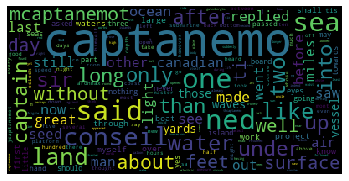

In [132]:
myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()